### Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

### What is Fake News?

### Problem Statement

### What is TfidfVectorizer?

### PassiveAggressiveClassifier

In [2]:
df_news = pd.read_csv("news.csv") # Reading the dataset news.csv into a DataFrame

In [3]:
df_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df_news.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [5]:
df_news.shape

(6335, 4)

In [6]:
labels = df_news.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [7]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

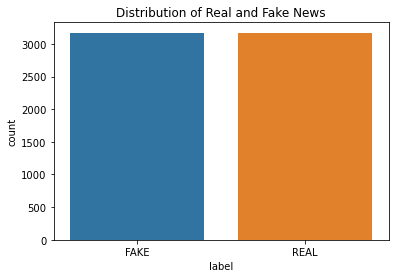

In [8]:
sns.countplot(df_news.label)
plt.title("Distribution of Real and Fake News")
plt.show()

In [9]:
# We use the train/test split technique to split the dataset into training and testing:
# We split the dataset into 80% for training and 20% for testing.

x_train, x_test, y_train, y_test = train_test_split(df_news['text'], labels, test_size=0.2, random_state=42)

In [10]:
# We now initialize the TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7, 
# Stop words are the most common words in a language that are to be filtered out before processing the natural language data.

# As we are working in a dataset which contains textual data, so it is necessary to remove the stop words before training 
# the model:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) # Initialize a TfidfVectorizer.

# Fit and transform train set, transform test set:
train_tfidf = vectorizer.fit_transform(x_train)
test_tfidf = vectorizer.transform(x_test)

In [11]:
# We now use PassiveAggressiveClassifier simply put, it remains passive for correct predictions and responds aggressively to
# incorrect predictions. We now train the fake news detection model by using the PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(train_tfidf, y_train) # Fit the transformed train set together with the y_train set.

# Now we predict the y_test set using the transformed x_test set:
y_predict = pac.predict(test_tfidf)

# Check the accuracy of the model:
score = accuracy_score(y_test, y_predict)

# Round() is a built-in function available with python. It will return you a float number that will be rounded to the decimal
# places which are given as input:
print(f'Accuracy Score of Passive Aggresive Scassifier: {round(score*100,2)}%')

Accuracy Score of Passive Aggresive Scassifier: 93.53%


In [12]:
CM=confusion_matrix(y_test, y_predict, labels=["FAKE", "REAL"])
print(CM) # Print the confution matrix for our model.

[[589  39]
 [ 43 596]]


In [13]:
True_positive=CM[0][0]
False_positive=CM[0][1]
False_negative=CM[1][0]
True_negative=CM[1][1]

In [14]:
print(f'With this model there are {True_positive} true positives, {True_negative} true negatives, {False_positive} false positives and {False_negative} false negatives.')

With this model there are 589 true positives, 596 true negatives, 39 false positives and 43 false negatives.
